# Machine Learning With Examples

Example driven Machine Learning.


## Data Driven X to Y
The neural network side of machine learning is a way to turn inputs which are generally called X into outputs which are generally called Y.

We can avoid writing an explicit algorithm for turning an X into a Y using machine learning and examples of such conversions which hae already been done.


To start off we try and learn the **AND** function. We won't be telling the computer exactly how to calculate the and function, rather we will give examples and let it learn on it's own.

We will import the things we will use later on here itself so that everything else can remain uncluttered.

In [1]:
%pylab inline
# Plotting, numpy
plt.xkcd() # plots look hand drawn. Remove this to have sharp graphs.

# We don't want warnings appearing while we do coding.
import warnings
warnings.filterwarnings("ignore")

from keras import models as M  # For easily building neural networks
from keras import layers as L

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


We can build our dataset here. Since we are trying to teach it the AND function we build our data using binary representation of true and false.

In [2]:
x = [[0, 0],
     [0, 1],
     [1, 0],
     [1, 1]]
y = [0, 0, 0, 1]

We can plot the data and see how it looks since it's already in 2d.

Text(0.5,1,'AND Function')

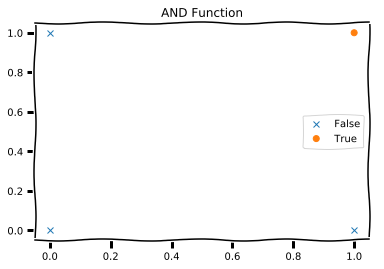

In [3]:
a, b = list(zip(*x))
plt.plot([i for i, label in zip(a, y) if label == 0], [i for i, label in zip(b, y) if label == 0], 'x', label='False')
plt.plot([i for i, label in zip(a, y) if label == 1], [i for i, label in zip(b, y) if label == 1], 'o', label='True')
plt.legend()
plt.title("AND Function")

We can use keras to build a model which has $ y = mx + c$ as it's base equation.

In [4]:
inp = L.Input((2,))  # Allow neural network to take input

out = L.Dense(1)(inp)  # y = m(inp) + c

model = M.Model(inp, out)  # build model and tell it what is input and what is output
model.compile('sgd', 'mse', ['acc'])

Training this model for a few iterations of the dataset will let it learn how to compute the AND function.

In [5]:
%%capture
history = model.fit(np.array(x),
                    np.array(y).reshape((4, 1)),
                    epochs=500
                    )

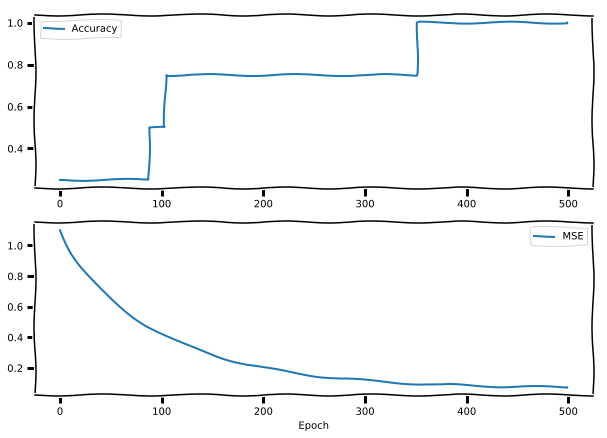

In [6]:
plt.subplots(figsize=(10, 7))

plt.subplot(211)
plt.plot(history.history['acc'], label='Accuracy')
plt.legend()
plt.subplot(212)
plt.plot(history.history['loss'], label='MSE')

plt.xlabel("Epoch")
plt.legend()

The model we chose, namely $y = mx + c$ was able to learn very well how to compute the AND function. We can see why this happened if we examine the plot of the function a little more. More on that later. We move on to the next thing, which is Linear Regression

## Linear Regression

Text(0.5,1,'Data to learn from')

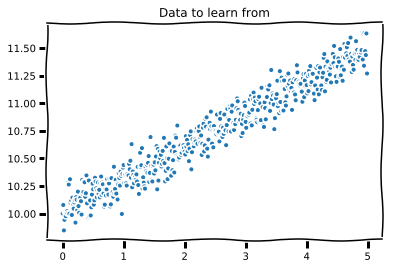

In [7]:
x = np.arange(0, 5, 0.01)
y = 0.3 * x + 10
y += np.random.normal(0, 0.1, x.shape)

plt.plot(x, y, '.')
plt.title("Data to learn from")

We need to recover the two numbers 0.3 and 10 from this data. Same as before we build our model $y = mx + c$ and give it this data to learn from.

In [8]:
inp = L.Input((1, ))

out = L.Dense(1)(inp)

model = M.Model(inp, out)
model.compile('sgd', 'mse')

In [9]:
%%capture
history = model.fit(np.array(x).reshape((-1, 1)),
                    np.array(y).reshape((-1, 1)),
                    epochs=100
                    )

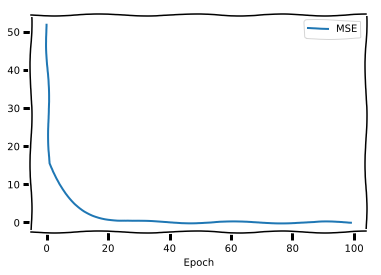

In [10]:
plt.plot(history.history['loss'], label='MSE')

plt.xlabel("Epoch")
plt.legend()

Let's see what numbers we were able to recover from this data.

In [11]:
m, c = model.get_weights()
m, c = m.flatten()[0], c.flatten()[0]
m, c

(0.2973969, 10.008947)

Those are relatively close to the numbers we were expecting. Training for more epochs will produce closer approximations of those numbers.

Movind on let's see how we can classify into one of two classes using this equation $y = mx + c$. In order to do that we set up the problem as predicting the probability of belonging to a class.

Since we know probability should not exceed one, we pass the $y$ through the **sigmoid** function which is $$ 1 \over{1 + e^{-x}}$$ This is not the only function which will return outputs between 0 and 1. There is a rich history regarding how and why it came to be popular. You might want to google that later on.

Now, out equation becomes $y = sig(mx + c)$ and the use of this equation is called to be logistic regression.


## Logistic regression

We quickly build a classification dataset using sklearn's inbuilt functions.

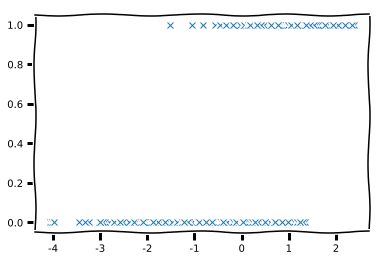

In [12]:
from sklearn.datasets import make_classification

x, y = make_classification(n_samples=1000, n_features=1,
                           n_informative=1, n_redundant=0,
                           n_clusters_per_class=1)

plt.plot(x, y, 'x')

As before we build the same model, but this time set the 'activation' to 'sigmoid' resulting in the Logistic regression model.

In [13]:
inp = L.Input((1, ))

out = L.Dense(1, activation='sigmoid')(inp)

model = M.Model(inp, out)
model.compile('sgd', 'mse', ['acc'])

In [14]:
%%capture
history = model.fit(np.array(x).reshape((-1, 1)),
                    np.array(y).reshape((-1, 1)),
                    epochs=200
                    )

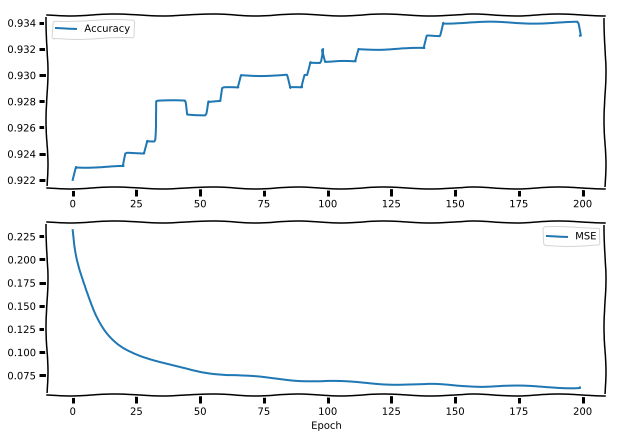

In [15]:
plt.subplots(figsize=(10, 7))

plt.subplot(211)
plt.plot(history.history['acc'], label='Accuracy')
plt.legend()
plt.subplot(212)
plt.plot(history.history['loss'], label='MSE')

plt.xlabel("Epoch")
plt.legend()

If you remember the first one we did, the AND function; that was not a logistic regression setup. We simply did a linear regression on it and it worked. Now's a good time to go see that graph. You see, in that graph, the two classes can be separated by simply drawing a straight line on the graph.

With the XOR problem this is not the case. Minsky's rebutal of the Perceptron was precicely this. A single perceptron cannot even learn the XOR function.

## Multi Layer Perceptron

Next, we build the XOR dataset that we want to learn and plot it as before.

In [16]:
x = [[0, 0],
     [0, 1],
     [1, 0],
     [1, 1]
    ]
y = [0, 1, 1, 0]

Text(0.5,1,'XOR Function')

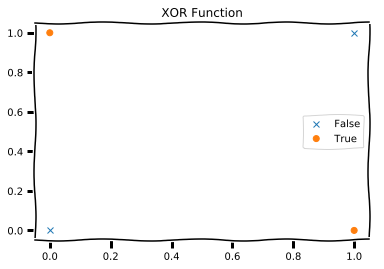

In [17]:
a, b = list(zip(*x))
plt.plot([i for i, label in zip(a, y) if label == 0], [i for i, label in zip(b, y) if label == 0], 'x', label='False')
plt.plot([i for i, label in zip(a, y) if label == 1], [i for i, label in zip(b, y) if label == 1], 'o', label='True')
plt.legend()
plt.title("XOR Function")

Notice how no single straight line can cut the graph in such a way so that all True's are on one side and all False on another. We need a curved line. Just to see this in action, let's build out linear regression model and try to learn this dataset.

In [18]:
inp = L.Input((2, ))
out = L.Dense(1)(inp)
model = M.Model(inp, out)
model.compile('sgd', 'mse', ['acc'])

In [19]:
%%capture
history = model.fit(np.array(x),
                    np.array(y).reshape((-1, 1)),
                    epochs=2000
                    )

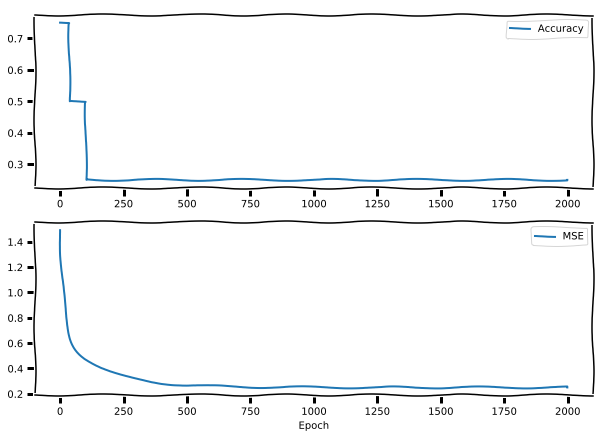

In [20]:
plt.subplots(figsize=(10, 7))

plt.subplot(211)
plt.plot(history.history['acc'], label='Accuracy')
plt.legend()
plt.subplot(212)
plt.plot(history.history['loss'], label='MSE')

plt.xlabel("Epoch")
plt.legend()

We see that the loss actually saturates at around 0.2 and does not lower itself beyond that. How about a logistic regression model? Can it learn more?

In [21]:
inp = L.Input((2, ))
out = L.Dense(1,activation='sigmoid')(inp)
model = M.Model(inp, out)
model.compile('sgd', 'mse', ['acc'])

In [22]:
%%capture
history = model.fit(np.array(x),
                    np.array(y).reshape((-1, 1)),
                    epochs=2000
                    )

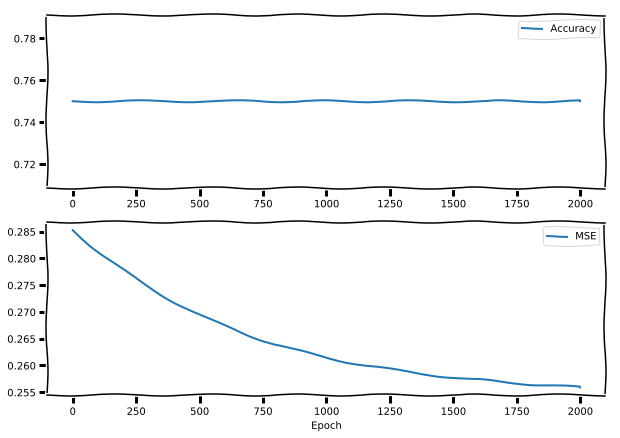

In [23]:
plt.subplots(figsize=(10, 7))

plt.subplot(211)
plt.plot(history.history['acc'], label='Accuracy')
plt.legend()
plt.subplot(212)
plt.plot(history.history['loss'], label='MSE')

plt.xlabel("Epoch")
plt.legend()

Now we can try a multi layer perceptron and see if it manages to learn the XOR function. 

In [24]:
inp = L.Input((2, ))

h1 = L.Dense(2, activation='sigmoid')(inp)
h2 = L.Dense(2, activation='sigmoid')(h1)
out = L.Dense(1, activation='sigmoid')(h2)

model = M.Model(inp, out)
model.compile('rmsprop', 'mse', ['acc'])

In [25]:
%%capture
history = model.fit(np.array(x),
                    np.array(y).reshape((-1, 1)),
                    epochs=2000
                    )

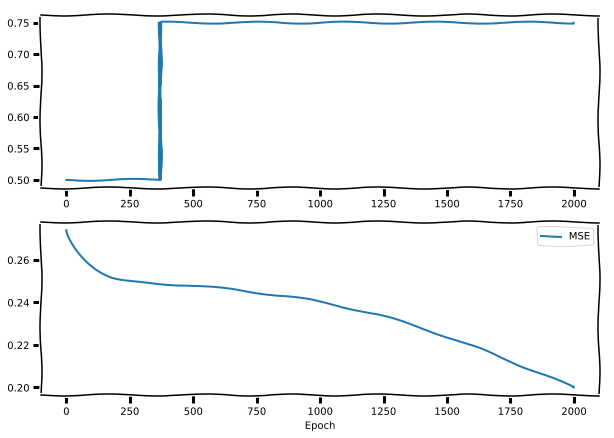

In [26]:
plt.subplots(figsize=(10, 7))

plt.subplot(211)
plt.plot(history.history['acc'], label='Accuracy')
plt.subplot(212)
plt.plot(history.history['loss'], label='MSE')

plt.xlabel("Epoch")
plt.legend()

With that we've seen that it has started to learn the XOR function. What we are witnessing here is the vanishing gradient problem. If we plot the sigmoid function we get the following graph.

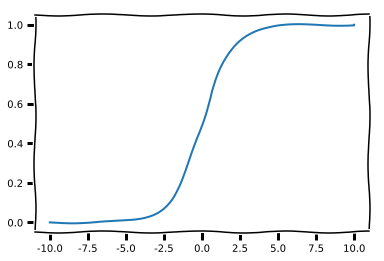

In [27]:
i = np.arange(-10, 10, 0.001)
s = 1 / (1 + np.exp(-i))
plt.plot(i, s)

As the numbers get closer and closer to 1 or 0, the slope of the function becomes smaller and smaller leading to a vanishing gradient. As our learning method is based on gradients (remember Backprop?) it learns less and less with each passing step.

Changing all activations to `tanh` except the last one can help alliveate this problem. This is also the enormous benefit of the `relu` function family. Gradients are never small, in fact they are always quiet large.

In [28]:
inp = L.Input((2, ))

h1 = L.Dense(2, activation='tanh')(inp)
h2 = L.Dense(2, activation='tanh')(h1)
out = L.Dense(1, activation='sigmoid')(h2)

model = M.Model(inp, out)
model.compile('rmsprop', 'mse', ['acc'])

In [29]:
%%capture
history = model.fit(np.array(x),
                    np.array(y).reshape((-1, 1)),
                    epochs=2000
                    )

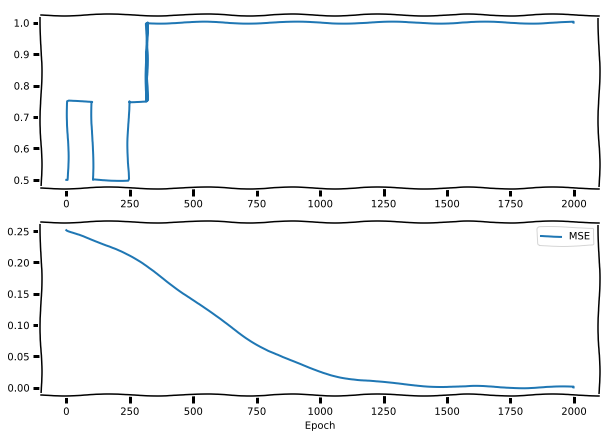

In [30]:
plt.subplots(figsize=(10, 7))

plt.subplot(211)
plt.plot(history.history['acc'], label='Accuracy')
plt.subplot(212)
plt.plot(history.history['loss'], label='MSE')

plt.xlabel("Epoch")
plt.legend()

Here we can see that the MLP Learned the XOR function, thus showing it can learn non linear mappings. That's all for now folks. For more there are a lot of blogs / docs on the internet which are better than what I can put up and so I'll give you links to those here and take your leave.

These links a spread across websites which have good Machine Learning Resources. This is to introduce you to the various points on the internet where you can expect good resources.

- [Iris Dataset: Finding flower species by it's measurements](https://www.kaggle.com/tonychanyt/keras-on-iris)
- [The Unreasonable Effectiveness of RNNs](https://karpathy.github.io/2015/05/21/rnn-effectiveness/)
- [Cats vs Dogs](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)
- [Number Digit recognition](https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/)